In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib as mpl

import seaborn as sns

import yfinance as yf
import numpy as np

In [2]:
start_date       = '2021-12-23'
month_begin_date = '2022-06-01'
end_date         = '2022-06-30'

## Some Functions For Easy of Use

In [3]:
def get_stock_data(symbol=['VTI'], start_date=start_date, end_date=end_date):
    """returns df of VTI data to compare with crypto data"""
    data_df = yf.download(symbol, start=start_date, end=end_date)
    
    return data_df['Close']

## Setup Global Plotting Parameters

In [15]:
plt.figure()
plt.rcParams.update({'font.size': 18}) # must set at the top. It controls text size in charts and plots

plt.rcParams["figure.dpi"] = 70

<Figure size 420x280 with 0 Axes>

##  Find File Containing Initial Purchase and Allocations

In [16]:
# Get the data for the portfolio
_initial_purchase_file = "2022 Weighted Crypto Portfolio.csv"
_data_folder           = "./data/"

init_portfolio_path = os.path.join(_data_folder, _initial_purchase_file)
init_portfolio_path

'./data/2022 Weighted Crypto Portfolio.csv'

In [17]:
init_portfolio = pd.read_csv(init_portfolio_path).set_index('Coin', drop=True)
init_portfolio

,Amount,Net Cost,Fees,Investment,Cost Basis
Coin,,,,,
BTC,0.000307,15.00,0.07,14.93,48623.690000
ETH,0.003787,15.00,0.07,14.93,3941.660000
BNB,0.023982,12.70,0.01,12.69,529.003900
SOL,0.058000,10.50,0.05,10.45,179.330000
ADA,7.120000,9.75,0.05,9.70,1.361600
WLUNA,0.104000,9.80,0.05,9.75,93.220000
AVAX,0.080000,9.79,0.05,9.74,121.330000
DOT,0.352000,9.80,0.05,9.75,27.680000
DOGE,42.300000,7.60,0.04,7.56,0.177400


### Initial Allocation Percentages

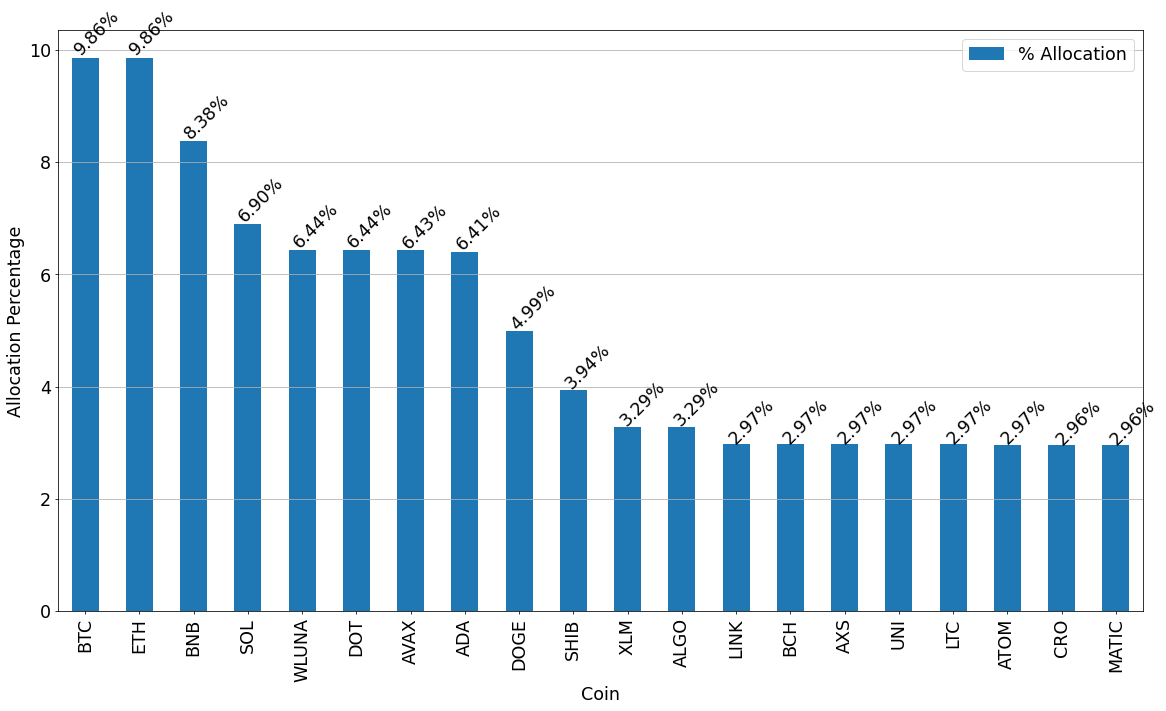

In [18]:
total = init_portfolio['Investment'].sum()

init_portfolio['% Allocation'] = (init_portfolio['Investment'] / total) * 100

#-- sort df by allocation size
init_portfolio = init_portfolio.sort_values(by='% Allocation', ascending=False)

ax = init_portfolio['% Allocation'].plot(kind='bar',
                                         grid=False,
                                         ylabel="Allocation Percentage",
                                         figsize=(20,11))

ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##  Open File With Historic Closing Data

In [19]:
_file           = "2022_portfolio_daily_close.csv"
_data_folder    = "./data"

historic_file_path = os.path.join(_data_folder, _file)

In [20]:
historic_df = pd.read_csv(historic_file_path).set_index('date')
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.170,0.18510,0.000039,2.6858,0.5951,163.74,18.180,22.190,1.4697,455.93,0.287776,28.380,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.170,0.18620,0.000036,2.4687,0.6280,161.35,17.500,21.470,1.5760,452.27,0.278628,26.870,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.860,0.19110,0.000038,2.6409,0.6434,158.00,17.490,22.120,1.5748,455.36,0.290047,29.790,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.340,0.18990,0.000038,2.8793,0.6233,155.96,18.670,22.990,1.6079,451.86,0.291987,32.170,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.970,0.18790,0.000039,2.7267,0.6234,155.78,19.110,23.020,1.6631,465.45,0.300288,29.680,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,21027.92,1197.13,233.9,39.39,0.4899,NaN,19.71,7.832,0.07295,0.000011,0.5584,0.1241,56.58,5.592,6.700,0.3316,112.89,0.120282,8.054,16.17
2022-06-27,20725.17,1191.27,233.8,38.50,0.4853,NaN,19.33,7.734,0.07206,0.000011,0.5321,0.1243,55.86,5.330,6.547,0.3310,111.44,0.118877,7.770,15.90
2022-06-28,20252.89,1142.65,226.9,35.30,0.4690,NaN,18.08,7.303,0.06602,0.000010,0.5099,0.1199,52.65,4.917,6.303,0.3124,103.03,0.114237,7.340,15.27


In [21]:
historic_df.dropna()
historic_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,50842.20,4113.08,549.0,190.07,1.4743,94.42,121.37,29.170,0.18510,0.000039,2.6858,0.5951,163.74,18.180,22.190,1.4697,455.93,0.287776,28.380,107.47
2021-12-24,50851.38,4049.65,542.1,190.65,1.3935,95.77,114.93,28.170,0.18620,0.000036,2.4687,0.6280,161.35,17.500,21.470,1.5760,452.27,0.278628,26.870,104.62
2021-12-25,50428.31,4097.43,547.4,193.06,1.4542,98.39,114.86,28.860,0.19110,0.000038,2.6409,0.6434,158.00,17.490,22.120,1.5748,455.36,0.290047,29.790,109.27
2021-12-26,50801.79,4065.91,546.4,198.00,1.4549,99.63,115.07,31.340,0.18990,0.000038,2.8793,0.6233,155.96,18.670,22.990,1.6079,451.86,0.291987,32.170,107.62
2021-12-27,50717.77,4038.64,563.7,195.74,1.5164,90.88,113.96,30.970,0.18790,0.000039,2.7267,0.6234,155.78,19.110,23.020,1.6631,465.45,0.300288,29.680,107.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,21027.92,1197.13,233.9,39.39,0.4899,NaN,19.71,7.832,0.07295,0.000011,0.5584,0.1241,56.58,5.592,6.700,0.3316,112.89,0.120282,8.054,16.17
2022-06-27,20725.17,1191.27,233.8,38.50,0.4853,NaN,19.33,7.734,0.07206,0.000011,0.5321,0.1243,55.86,5.330,6.547,0.3310,111.44,0.118877,7.770,15.90
2022-06-28,20252.89,1142.65,226.9,35.30,0.4690,NaN,18.08,7.303,0.06602,0.000010,0.5099,0.1199,52.65,4.917,6.303,0.3124,103.03,0.114237,7.340,15.27


## Plot of Normalized Price Data
This is a plot of the price movement in every coin, but normalized so they all fit in the same vertical range. It's just easier to see.

In [22]:
#normalize by doing (df - mean(df)) / std(df)
normalized_df = (historic_df - historic_df.mean()) / historic_df.std()

In [23]:
normalized_df

,BTC,ETH,BNB,SOL,ADA,WLUNA,AVAX,DOT,DOGE,SHIB,MATIC,CRO,LTC,UNI,LINK,ALGO,BCH,XLM,ATOM,AXS
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,1.742432,2.013488,2.141720,2.447842,1.971855,0.790901,1.947633,1.925414,1.767414,2.176353,2.156488,1.704573,2.027723,2.199293,1.472653,1.807519,1.866219,2.014965,0.497910,2.560261
2021-12-24,1.743625,1.926867,2.055075,2.462343,1.692970,0.835574,1.722122,1.764367,1.799541,1.855917,1.799238,1.942467,1.948051,2.026363,1.343098,2.096198,1.825484,1.826713,0.348746,2.438960
2021-12-25,1.688666,1.992116,2.121628,2.522595,1.902479,0.922273,1.719671,1.875490,1.942655,2.060996,2.082602,2.053822,1.836376,2.023820,1.460057,2.092940,1.859875,2.061698,0.637196,2.636872
2021-12-26,1.737183,1.949072,2.109071,2.646100,1.904895,0.963305,1.727024,2.274887,1.907607,2.125083,2.474902,1.908482,1.768371,2.323904,1.616603,2.182829,1.820921,2.101621,0.872303,2.566645
2021-12-27,1.726268,1.911832,2.326309,2.589598,2.117165,0.673758,1.688155,2.215300,1.849193,2.227622,2.223791,1.909205,1.762371,2.435800,1.622002,2.332736,1.972175,2.272443,0.626330,2.542385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,-2.130548,-1.968547,-1.815023,-1.319298,-1.425843,NaN,-1.612223,-1.511017,-1.508145,-1.379203,-1.344257,-1.701141,-1.544540,-1.001944,-1.314586,-1.283225,-1.951765,-1.431810,-1.509982,-1.325629
2022-06-27,-2.169876,-1.976549,-1.816279,-1.341549,-1.441720,NaN,-1.625529,-1.526800,-1.534139,-1.366385,-1.387535,-1.699694,-1.568542,-1.068573,-1.342117,-1.284854,-1.967904,-1.460723,-1.538036,-1.337121
2022-06-28,-2.231227,-2.042945,-1.902923,-1.421552,-1.497980,NaN,-1.669301,-1.596211,-1.710549,-1.506095,-1.424067,-1.731510,-1.675550,-1.173602,-1.386021,-1.335367,-2.061506,-1.556207,-1.580514,-1.363935


<AxesSubplot:title={'center':'Normalized Price Movements'}, xlabel='date'>

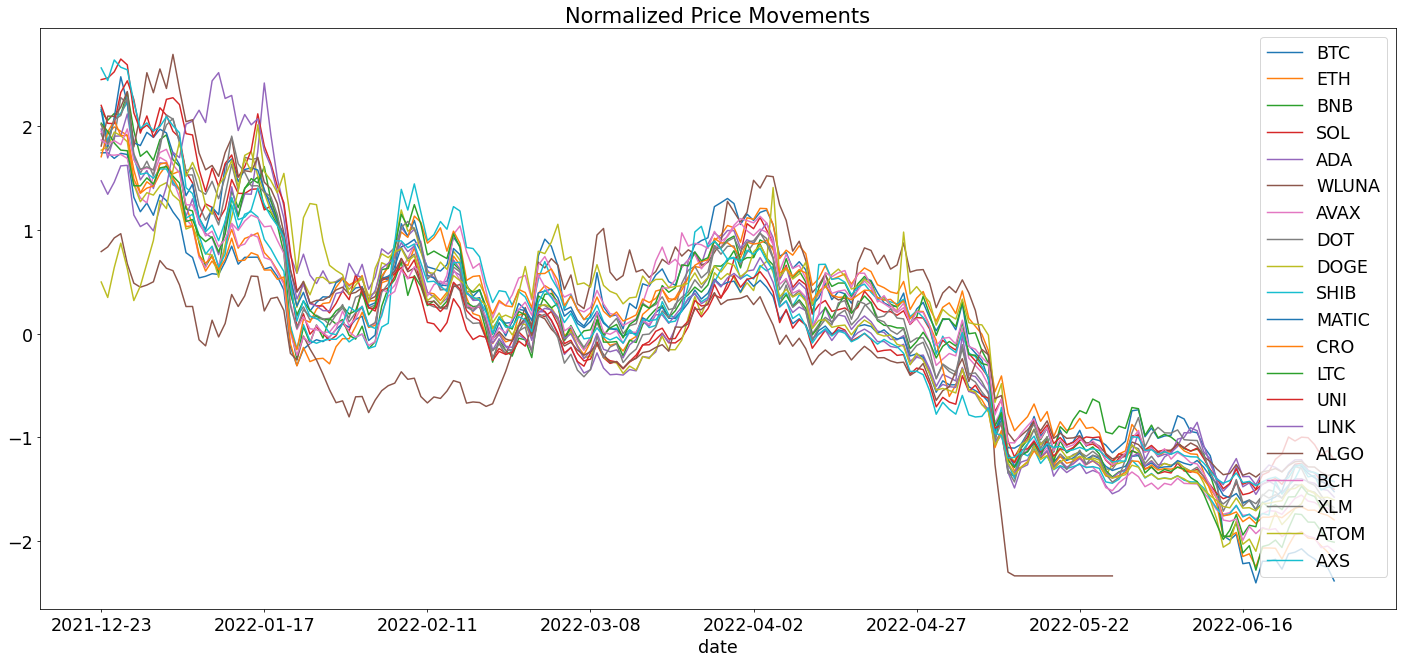

In [24]:
normalized_df.plot(figsize=(25,11),title="Normalized Price Movements")

## Percent Changes

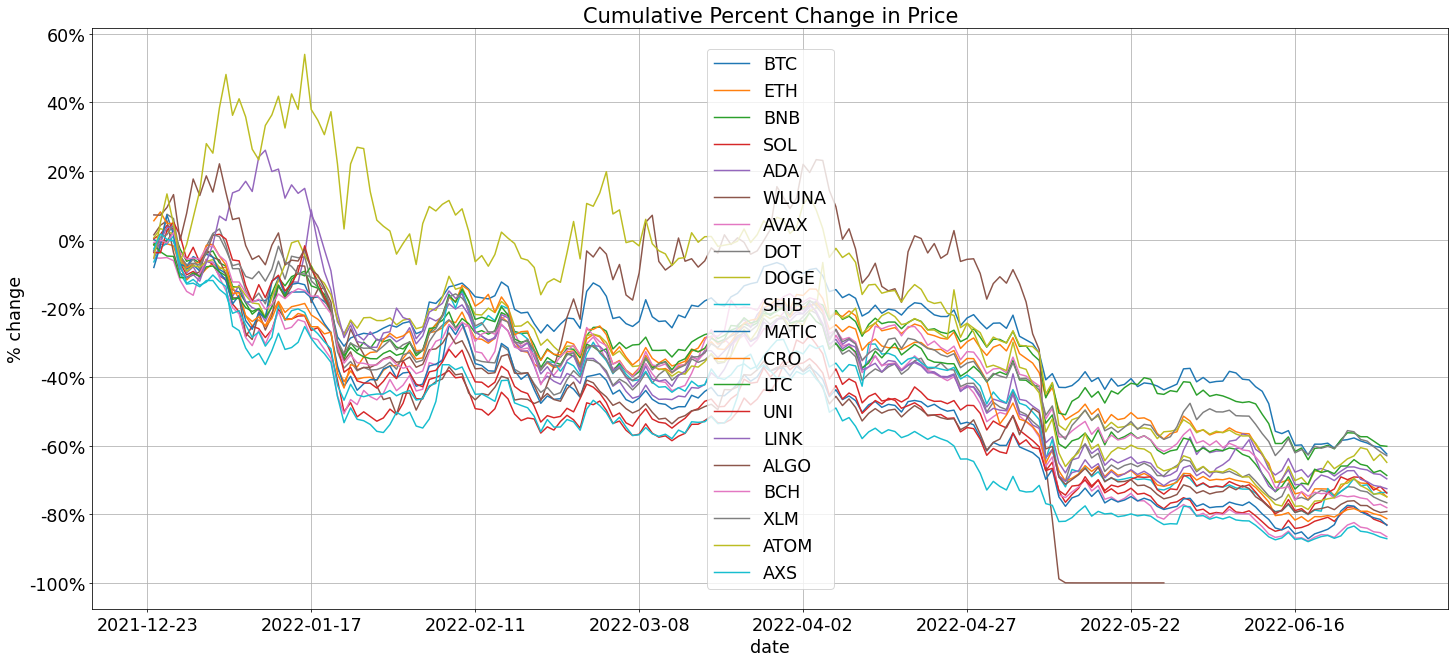

In [25]:
_price_change = historic_df.diff().cumsum()
percent_change_df = (_price_change / historic_df.iloc[0])*100
percent_change_df


ax = percent_change_df.plot(
        title="Cumulative Percent Change in Price",
        figsize=(25,11),
        grid=True,
        ylabel="% change"
)

ax.legend(loc="center")
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: f"{x:.0f}%"))

### Tracking Investment

In [26]:
init_investments = init_portfolio['Amount']
init_investments

Coin
BTC           0.000307
ETH           0.003787
BNB           0.023982
SOL           0.058000
WLUNA         0.104000
DOT           0.352000
AVAX          0.080000
ADA           7.120000
DOGE         42.300000
SHIB     164383.000000
XLM          16.000000
ALGO          3.000000
LINK          0.210000
BCH           0.010157
AXS           0.043000
UNI           0.259222
LTC           0.028594
ATOM          0.100000
CRO           7.800000
MATIC         1.700000
Name: Amount, dtype: float64

In [27]:
init_portfolio.columns

Index(['Amount', 'Net Cost', 'Fees', 'Investment', 'Cost Basis',
       '% Allocation'],
      dtype='object')

In [28]:
value_df = historic_df.multiply(init_investments, axis=1)
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,DOT,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM
date,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.8380,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.829730,10.267840,15.574465,4.65990,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416
2021-12-24,9.921720,4.7280,2.6870,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.876260,9.915840,15.334283,4.50870,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048
2021-12-25,10.353904,4.7244,2.9790,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.083530,10.158720,15.515206,4.64520,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752
2021-12-26,10.358888,4.8237,3.2170,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.032770,11.031680,15.395853,4.82790,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792
2021-12-27,10.796768,4.9893,2.9680,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.948170,10.901440,15.292593,4.83420,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,3.488088,0.9948,0.8054,1.5768,0.69531,1.146570,5.609390,6.454520,0.96798,3.085785,2.756864,4.533017,1.40700,1.617834,0.94928,1.801638,2.28462,1.449569,NaN,1.924512
2022-06-27,3.455336,0.9930,0.7770,1.5464,0.68370,1.131843,5.606992,6.361591,0.96954,3.048138,2.722368,4.510827,1.37487,1.597247,0.90457,1.818076,2.23300,1.381653,NaN,1.902032
2022-06-28,3.339280,0.9372,0.7340,1.4464,0.65661,1.046426,5.441516,6.216625,0.93522,2.792646,2.570656,4.326724,1.32363,1.505461,0.86683,1.638899,2.04740,1.274595,NaN,1.827792


In [29]:
value_df['total'] = value_df.sum(axis=1)

In [30]:
value_df

,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,BTC,CRO,DOGE,...,ETH,LINK,LTC,MATIC,SHIB,SOL,UNI,WLUNA,XLM,total
date,,,,,,,,,,,,,,,,,,,,,
2021-12-23,10.497016,4.4091,2.8380,9.7096,4.62121,4.630662,13.166118,15.606013,4.64178,7.829730,...,15.574465,4.65990,4.681941,4.56586,6.361622,11.02406,4.712656,9.81968,4.604416,154.221669
2021-12-24,9.921720,4.7280,2.6870,9.1944,4.49866,4.593489,13.000642,15.608831,4.89840,7.876260,...,15.334283,4.50870,4.613602,4.19679,5.950665,11.05770,4.536385,9.96008,4.458048,151.539495
2021-12-25,10.353904,4.7244,2.9790,9.1888,4.69861,4.624873,13.127747,15.478970,5.01852,8.083530,...,15.515206,4.64520,4.517812,4.48953,6.213677,11.19748,4.533793,10.23256,4.640752,154.423084
2021-12-26,10.358888,4.8237,3.2170,9.2056,4.62766,4.589325,13.103765,15.593609,4.86174,8.032770,...,15.395853,4.82790,4.459481,4.89481,6.295869,11.48400,4.839675,10.36152,4.671792,156.676637
2021-12-27,10.796768,4.9893,2.9680,9.1168,4.60315,4.727352,13.518653,15.567820,4.86252,7.948170,...,15.292593,4.83420,4.454334,4.63539,6.427375,11.35292,4.953732,9.45152,4.804608,156.206646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,3.488088,0.9948,0.8054,1.5768,0.69531,1.146570,5.609390,6.454520,0.96798,3.085785,...,4.533017,1.40700,1.617834,0.94928,1.801638,2.28462,1.449569,NaN,1.924512,43.548976
2022-06-27,3.455336,0.9930,0.7770,1.5464,0.68370,1.131843,5.606992,6.361591,0.96954,3.048138,...,4.510827,1.37487,1.597247,0.90457,1.818076,2.23300,1.381653,NaN,1.902032,43.018182
2022-06-28,3.339280,0.9372,0.7340,1.4464,0.65661,1.046426,5.441516,6.216625,0.93522,2.792646,...,4.326724,1.32363,1.505461,0.86683,1.638899,2.04740,1.274595,NaN,1.827792,40.927909


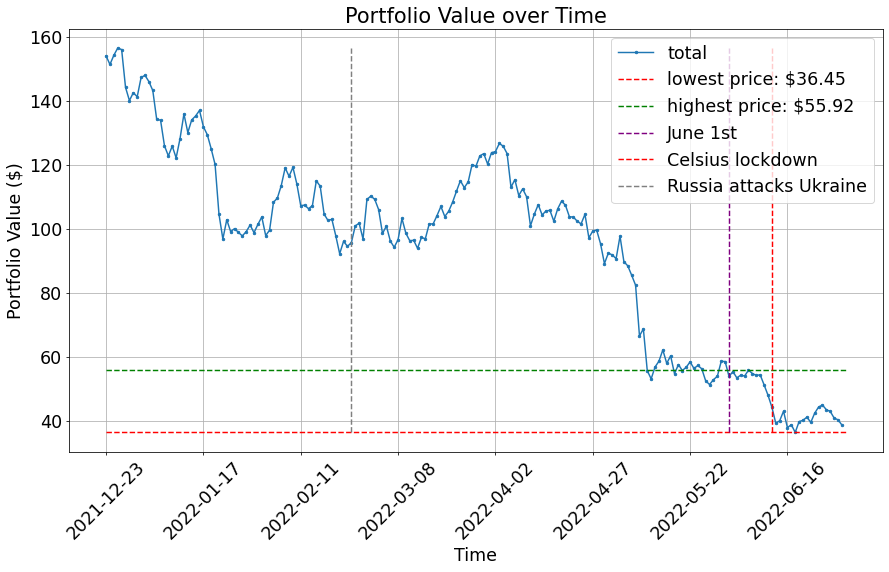

In [31]:
ax = value_df['total'].plot(figsize=(15,8), 
                            ylabel='Portfolio Value ($)', 
                            xlabel='Time',
                            rot=45,
                            marker='.', 
                            markersize=5,
                            title="Portfolio Value over Time",
                            grid=True)

#ax.grid('on', which='minor', axis='y' )
#ax.grid('off', which='major', axis='y',)# linestyle='-', linewidth=0.25,)
#ax.hlines(value_df['total'].min(), ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='red')
#ax.hlines(114, ax.get_xticks()[0], ax.get_xticks()[-1], linestyle='--', color='green')

#------- Creating Horizontal and Vertical Lines For Important Dates
highest_price = value_df[month_begin_date:end_date]['total'].max()
lowest_price  = value_df[month_begin_date:end_date]['total'].min()

xmin = 0
xmax = len(value_df)
ymin = value_df['total'].min()
ymax = value_df['total'].max()

ax.hlines(lowest_price, xmin=xmin, xmax=xmax, linestyle='--', color='red'   , label=f"lowest price: ${lowest_price:.2f}")
ax.hlines(highest_price, xmin=xmin, xmax=xmax, linestyle='--', color='green', label=f"highest price: ${highest_price:.2f}")

#ax.vlines('10', ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='white')
#ax.vlines(40, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='gray', label="February 1st")
#ax.vlines(63, ax.get_yticks().min(), ax.get_yticks().max(), linestyle='--', color='purple', label="Russia attacks Ukraine")

ax.vlines(160, ymin=ymin, ymax=ymax, linestyle='--', color='purple', label="June 1st")
ax.vlines(171, ymin=ymin, ymax=ymax, linestyle='--', color='red', label='Celsius lockdown')
ax.vlines(63, ymin=ymin, ymax=ymax, linestyle='--', color='gray', label="Russia attacks Ukraine")

#-- x-axis formatting
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)

#------- Makes Line lables show up
ax.legend()

#ax.plot(pad_inches=0)

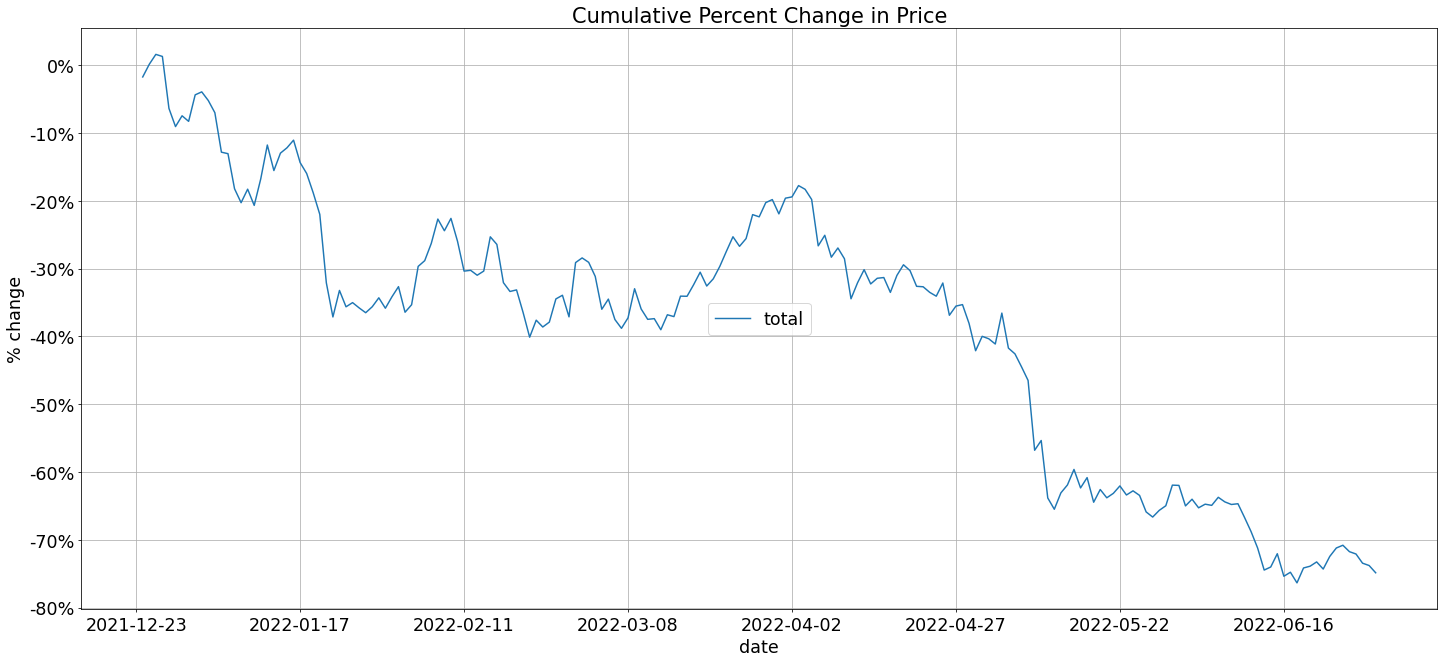

In [32]:
plt.rcParams.update({'font.size': 18}) # must set at the top. It controls text size in charts and plots

_price_change = value_df['total'].diff().cumsum()
percent_change_df = (_price_change / value_df['total'].iloc[0])*100
percent_change_df


ax = percent_change_df.plot(
        title="Cumulative Percent Change in Price",
        figsize=(25,11),
        grid=True,
        ylabel="% change"
)

ax.legend(loc="center")
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: f"{x:.0f}%"))

In [101]:
#-- Losses per Coin Since Inception

# _summary_df = pd.DataFrame([value_df.mean(), value_df.sum()], index=['Mean', 'Total'])

# plt.table(cellText  = _summary_df.values, 
#           colWidths = [0.25]*len(value_df.columns),
#           rowLabels = _summary_df.index,
#           colLabels = _summary_df.columns,
#           cellLoc   = 'center',
#           rowLoc    = 'center',
#           loc       = 'top',
# )

losses_df = pd.DataFrame()
losses_df['initial value'] = value_df.drop(columns=['total']).iloc[0].sort_values(ascending=False)
losses_df['final value']   = value_df.drop(columns=['total']).iloc[-1]

losses_df['$ P/L'] = losses_df['final value'] - losses_df['initial value']
losses_df['% P/L'] = (losses_df['$ P/L'] / losses_df['initial value'])

losses_df = losses_df.sort_values(by='% P/L', ascending=False)
losses_df

,initial value,final value,$ P/L,% P/L
BNB,13.166118,5.240067,-7.926051,-0.602004
BTC,15.606013,5.861536,-9.744478,-0.624405
XLM,4.604416,1.705952,-2.898464,-0.629497
DOGE,7.829730,2.749500,-5.080230,-0.648838
LTC,4.681941,1.466002,-3.215939,-0.686882
ADA,10.497016,3.181928,-7.315088,-0.696873
LINK,4.659900,1.278480,-3.381420,-0.725642
SHIB,6.361622,1.676707,-4.684915,-0.736434
UNI,4.712656,1.233378,-3.479278,-0.738284
ATOM,2.838000,0.711800,-2.126200,-0.749190


In [102]:
print(f"| {'Coin':^7} | {'Initial Value':^15} | {'Final Value':^13} | {'$ P/L':^9} | {'% P/L':^9} |")
print(f"{'-'*69}")
for row in losses_df.itertuples():
    coin, init_val, final_val, PnL, percent_PnL = row
    
    print(f"| {coin:^7} | ${init_val:^14.2f} | ${final_val:^12.2f} | ${PnL:8.2f} | {percent_PnL:9.2%} |")

|  Coin   |  Initial Value  |  Final Value  |   $ P/L   |   % P/L   |
---------------------------------------------------------------------
|   BNB   | $    13.17      | $    5.24     | $   -7.93 |   -60.20% |
|   BTC   | $    15.61      | $    5.86     | $   -9.74 |   -62.44% |
|   XLM   | $     4.60      | $    1.71     | $   -2.90 |   -62.95% |
|  DOGE   | $     7.83      | $    2.75     | $   -5.08 |   -64.88% |
|   LTC   | $     4.68      | $    1.47     | $   -3.22 |   -68.69% |
|   ADA   | $    10.50      | $    3.18     | $   -7.32 |   -69.69% |
|  LINK   | $     4.66      | $    1.28     | $   -3.38 |   -72.56% |
|  SHIB   | $     6.36      | $    1.68     | $   -4.68 |   -73.64% |
|   UNI   | $     4.71      | $    1.23     | $   -3.48 |   -73.83% |
|  ATOM   | $     2.84      | $    0.71     | $   -2.13 |   -74.92% |
|   ETH   | $    15.57      | $    3.91     | $  -11.67 |   -74.92% |
|   DOT   | $    10.27      | $    2.40     | $   -7.87 |   -76.65% |
|   BCH   | $     4.

## Correlation Analysis
Simple correlation heatmap between each coin (add correlation between stock market or SPY at some point).

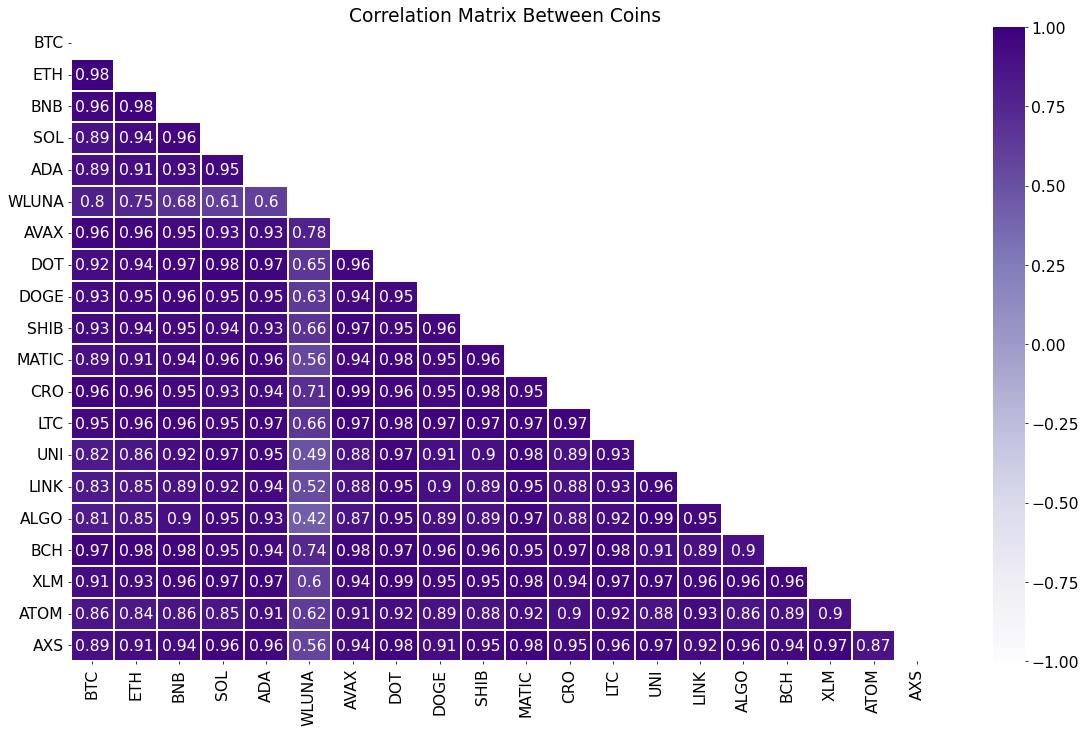

In [33]:
#code for this cell modified from https://www.interviewqs.com/blog/py-stock-correlation

plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots

plt.figure(figsize=(20, 12))

correlation_df = historic_df.corr(method='pearson')

#-- take the bottom triangle since it repeats itself
mask = np.zeros_like(correlation_df)
mask[np.triu_indices_from(mask)] = True

#-- generate plot
cmaps = ['YlOrRd', 'YlGnBu', 'PuBuGn', 'Greys', 'Blues','Reds','Purples', 'Greens']
sns.heatmap(correlation_df, cmap='Purples', vmax=1.0, vmin=-1.0, annot=True, mask = mask, linewidths=2,).set(title="Correlation Matrix Between Coins")

plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

plt.show()

### Stock Market and Crypto Correlation

[*********************100%***********************]  1 of 1 completed


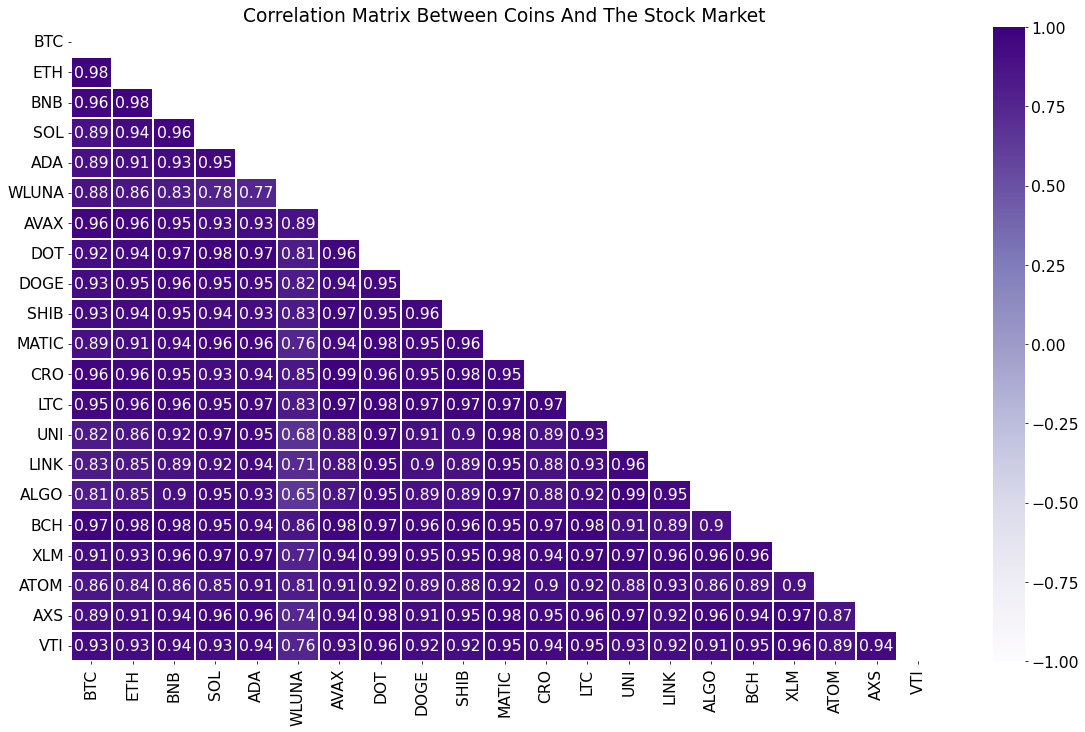

In [35]:
#code for this cell modified from https://www.interviewqs.com/blog/py-stock-correlation
plt.rcParams.update({'font.size': 16}) # must set at the top. It controls text size in charts and plots
plt.figure(figsize=(20, 12))

#-- join portofolio value with stock data 
stock_crypto_df = historic_df.copy()
stock_crypto_df['VTI'] = get_stock_data(end_date=end_date)
#stock_crypto_df = pd.DataFrame()
#stock_crypto_df['crypto'] = value_df['total']
#stock_crypto_df['VTI'] = get_stock_data(end_date='2022-06-01')

#-- interpolate data to fill missing days for VTI
stock_crypto_df = stock_crypto_df.interpolate(axis=0)


#-- Create a correlation matrix (DataFrame)
correlation_df = stock_crypto_df.corr(method='pearson')

#-- take the bottom triangle since it repeats itself
mask = np.zeros_like(correlation_df)
mask[np.triu_indices_from(mask)] = True

#-- generate plot
cmaps = ['YlOrRd', 'YlGnBu', 'PuBuGn', 'Greys', 'Blues','Reds','Purples', 'Greens']
sns.heatmap(correlation_df, cmap='Purples', vmax=1.0, vmin=-1.0, annot=True, mask = mask, linewidths=2,).set(title="Correlation Matrix Between Coins And The Stock Market")

plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

plt.show()

## Plot Changes in Allocation Percentages
In this plot, I will show a comparison between the initial allocation vs the current allocation percentages.

In [26]:
# Compute new allocation percentages
current_values = value_df[end_date:].drop('total', axis=1).transpose()[end_date]
current_allocation = ((current_values / current_values.sum()) * 100)
current_allocation

ADA       8.212229
ALGO      2.368489
ATOM      1.837083
AVAX      3.373749
AXS       1.534834
BCH       2.619196
BNB      13.524075
BTC      15.128022
CRO       2.240580
DOGE      7.096177
DOT       6.186721
ETH      10.081567
LINK      3.299626
LTC       3.783599
MATIC     1.977458
SHIB      4.327408
SOL       4.823078
UNI       3.183223
WLUNA          NaN
XLM       4.402887
Name: 2022-06-30, dtype: float64

In [27]:
index = current_allocation.index
index

Index(['ADA', 'ALGO', 'ATOM', 'AVAX', 'AXS', 'BCH', 'BNB', 'BTC', 'CRO',
       'DOGE', 'DOT', 'ETH', 'LINK', 'LTC', 'MATIC', 'SHIB', 'SOL', 'UNI',
       'WLUNA', 'XLM'],
      dtype='object')

In [28]:
comparison_df = pd.DataFrame({'Orginal % Allocation':init_portfolio['% Allocation'],
                              'Current % Allocation':current_allocation}, index=index)

In [29]:
#-- sort df by current allocation
comparison_df = comparison_df.sort_values(by='Current % Allocation', ascending=False)

In [30]:
comparison_df

,Orginal % Allocation,Current % Allocation
BTC,9.862597,15.128022
BNB,8.382878,13.524075
ETH,9.862597,10.081567
ADA,6.407716,8.212229
DOGE,4.994055,7.096177
DOT,6.440745,6.186721
SOL,6.903158,4.823078
XLM,3.289734,4.402887
SHIB,3.943718,4.327408
LTC,2.972652,3.783599


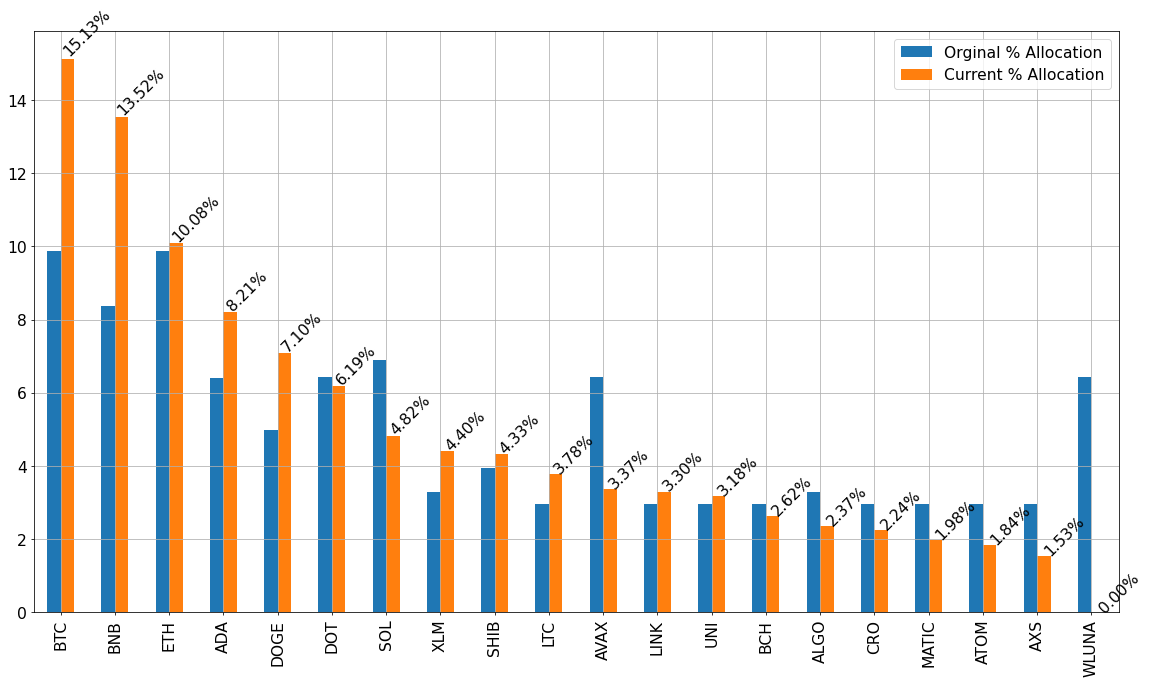

In [31]:
ax = comparison_df.plot(kind = 'bar',
                        y    = ["Orginal % Allocation", "Current % Allocation"],
                        figsize = (20,11),
                        grid=True,
                       )

#ax.grid(axis='y')
ax.legend()

#-- Annotate each bar in the chart
for p in ax.patches:
    if p.xy[0]%1 != 0:  #print(p) to understand what p.xy is
        continue   #cheat way to ignore the initial allocation bars and only plot new ones (it is very messy to put all of them)
    _value:str = f"{p.get_height():.2f}%"
    ax.annotate(_value, (p.get_x() * 1.005, p.get_height() * 1.005),rotation=45)
    #ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Allocation % As a Pie Chart

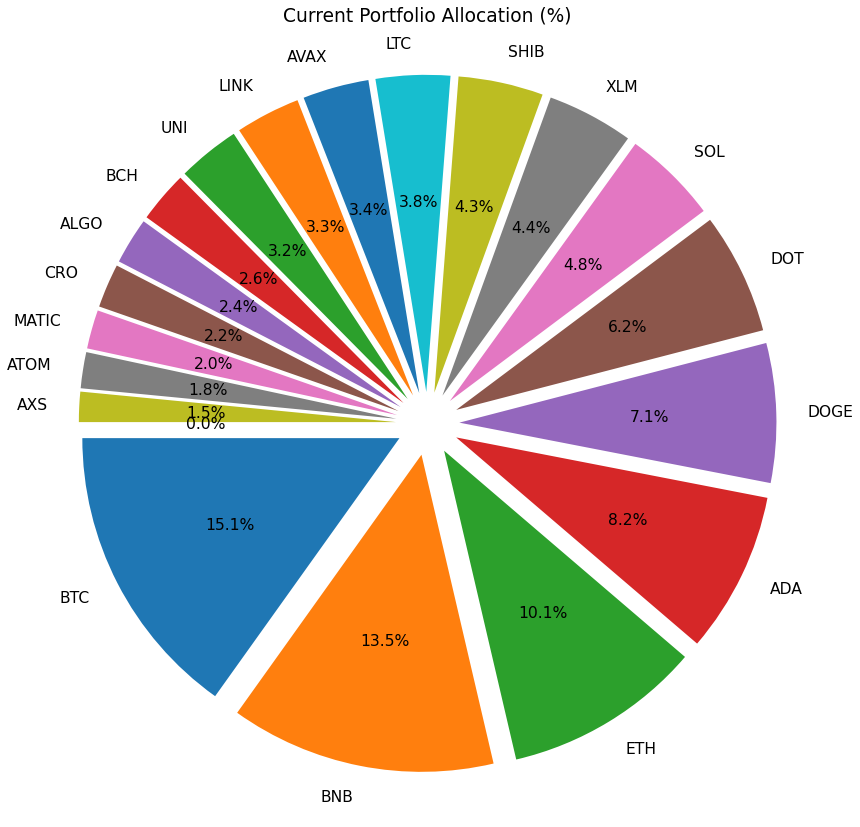

In [32]:
# ax = comparison_df.plot(kind = 'pie',
#                         y    = "Current % Allocation",
#                         figsize = (20,11),
#                         #grid=True,
#                        )

ax = comparison_df.plot(
        kind='pie',
        y='Current % Allocation',
        figsize = (15,15),
        title="Current Portfolio Allocation (%)", 
        legend=False,
        label="",  #this prevents a label for the column to be created on the side of the pie
                   
        autopct='%1.1f%%', 
        #explode=[0.1]*5 + [0.05]*(len(comparison_df)-5),  #provide a list of how much to explode each wedge (list length must be the same as number of coins)
        explode=[0.1]*len(comparison_df),
        #shadow=True, 
        startangle=180,
)

#ax.legend(loc='best')

In [44]:
#-- Compute % allocation of top 5
top_5_alloc = comparison_df['Current % Allocation'].head(5).sum()  #I don' need to sort here because it has been sorted in previous cell

#-- compute % allocation of top 10
top_10_alloc = comparison_df['Current % Allocation'].head(10).sum()

#-- compute % allocation of bottom 10
bottom_10_alloc = comparison_df['Current % Allocation'].tail(10).sum()


#-- print results
print(f"{'='*60}")
print(f"Top 5 Coins Dominance     : {top_5_alloc:.2f}%")
print(f"Top 10 Coins Dominance    : {top_10_alloc:.2f}%")
print(f"Bottom 10 Coins Dominance : {bottom_10_alloc:.2f}%\n")



Top 5 Coins Dominance     : 54.04%
Top 10 Coins Dominance    : 77.57%
Bottom 10 Coins Dominance : 22.43%



## Monthly Performance

In [33]:
_month_init = value_df['total'].loc[month_begin_date]
_month_end  = value_df['total'].loc[end_date]
_percent_change = ((_month_end - _month_init) / _month_init) * 100

_monthly_min = value_df['total'][month_begin_date:end_date].min()
_monthly_max = value_df['total'][month_begin_date:end_date].max()

print(f"Monthly Performance\n{'-'*30}")

print(f"Initial Value : ${_month_init:.2f}")
print(f"Final Value   : ${_month_end:.2f}")
print(f"Value Change  : ${_month_end - _month_init:.2f}\n")

print(f"Lowest Value  : ${_monthly_min:.2f}")
print(f"Highest Value : ${_monthly_max:.2f}\n")

print(f"Monthly Gain/Loss (%): {_percent_change:.2f}")

Monthly Performance
------------------------------
Initial Value : $53.96
Final Value   : $38.75
Value Change  : $-15.21

Lowest Value  : $36.45
Highest Value : $55.92

Monthly Gain/Loss (%): -28.19


## Total Performance
Performance since portfolio inception.

In [34]:
_total_init = value_df['total'].loc[start_date]
_total_end  = value_df['total'].loc[end_date]
_total_percent_change = ((_total_end - _total_init) / _total_init) * 100

_total_min = value_df['total'].min()
_total_max = value_df['total'].max()


print(f"Total Performance\n{'-'*30}")

print(f"Initial Value : ${_total_init:.2f}")
print(f"Final Value   : ${_total_end:.2f}")
print(f"Value Change  : ${_total_end - _total_init:.2f}\n")

print(f"Lowest Value  : ${_total_min:.2f}")
print(f"Highest Value : ${_total_max:.2f}\n")

print(f"Total Gain/Loss (%): {_total_percent_change:.2f}")

Total Performance
------------------------------
Initial Value : $154.22
Final Value   : $38.75
Value Change  : $-115.48

Lowest Value  : $36.45
Highest Value : $156.68

Total Gain/Loss (%): -74.88
